In [1]:
import numpy as np
import math

### Gradient Descent

In [2]:
def gradient_descent(X, y, learing_rate=0.01, iterations=1000):
    m, a, b=len(y), 0, 0
    costs=[]
    for _ in range(iterations):
        y_pred=a+b*X
        error=y_pred-y
        a=a-learing_rate*sum(error)/m
        b=b-learing_rate*error.dot(X)
        cost=(1/(2*m))*sum(error**2)
        costs.append(cost)
    return a, b, costs
    

### Root Mean Squared Error

In [3]:
def root_mean_sqaured_error(y_pred, y):
    error=y-y_pred
    error=error**2
    s=sum(error)
    s/=len(y)
    return math.sqrt(s)

### Mean Absolute Error

In [4]:
def mean_absoulute_error(y_pred, y):
    error=abs(y-y_pred)
    return sum(error)/len(y)

### R2 Score

In [5]:
def r2_score(y_pred, y):
    avg=y.mean()
    SSres=sum((y-y_pred)**2)
    SStot=sum((y-avg)**2)
    return 1-SSres/SStot

In [6]:
X=np.arange(1, 6)
Y=np.array([3, 4, 5, 7, 5])

In [7]:
a, b, costs=gradient_descent(X, Y)
y_pred=a+b*X

In [8]:
print(a, b, root_mean_sqaured_error(y_pred, Y), mean_absoulute_error(y_pred, Y), r2_score(y_pred, Y))

2.263493307840752 0.8194363043824198 0.9025768411894179 0.6556395558023976 0.537133548720757


In [8]:
import matplotlib.pyplot as plt

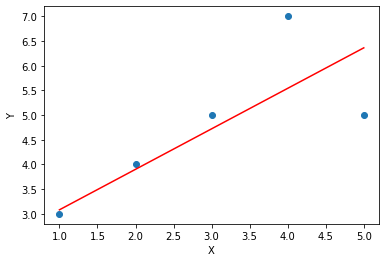

In [9]:
plt.scatter(X, Y)
plt.plot(X, y_pred, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

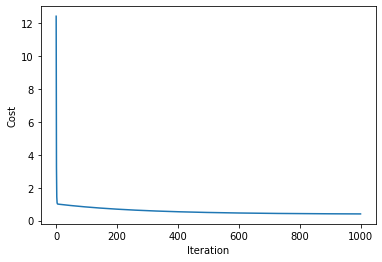

In [10]:
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

### Ridge

In [11]:
def Regularization(X, Y):
    from sklearn.linear_model import Ridge

    alphas = np.array([2**i for i in range(-18, 51, 2)])

    best_mse, best_alpha = float("inf"), None

    from sklearn.metrics import mean_squared_error

    for alpha in alphas:
        regressor = Ridge(alpha=alpha)
        regressor.fit(X, Y)
        y_pred = regressor.predict(X)
        mse = mean_squared_error(Y, y_pred)

        if mse < best_mse:
            best_mse, best_alpha = mse, alpha
    return np.array([best_mse, best_alpha])

In [12]:
X=X.reshape(-1, 1)
Y=Y.reshape(-1, 1)
mse, alpha=Regularization(X, Y)

In [14]:
print(mse, alpha)

0.7800000000001427 3.814697265625e-06


In [15]:
from sklearn.linear_model import Ridge

regressor=Ridge(alpha=alpha)
regressor.fit(X, Y)

Ridge(alpha=3.814697265625e-06)

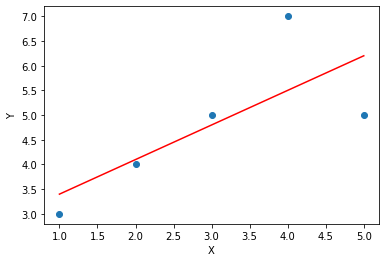

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, regressor.predict(X), color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y, regressor.predict(X))
print(mse)

0.7800000000001427


In [18]:
costs=[]
A=np.arange(1, 5, 0.01)
for a in A:
    y_pred=a+X*b
    error=math.sqrt(sum((Y-y_pred)**2))
    costs.append(error)

costs=np.array(costs)

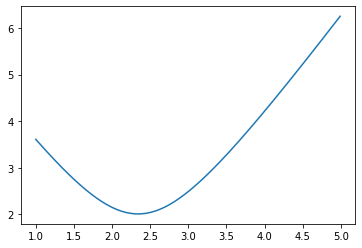

In [19]:
plt.plot(A, costs)


In [20]:
A = np.arange(1, 5, 0.01)
B = np.arange(1, 5, 0.01)
x, y=[], []
costs = []
for a in A:
    for b in B:
        y_pred = a + X * b
        x.append(a)
        y.append(b)
        error = math.sqrt(sum((Y - y_pred) ** 2))
        costs.append(error)


In [21]:
x=np.array(x)
y=np.array(y)
costs=np.array(costs)

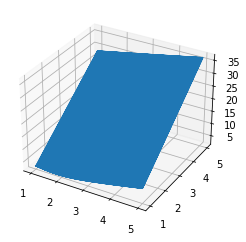

In [22]:
ax=plt.axes(projection="3d")
ax.plot3D(x, y, costs)
plt.show()